In [ ]:
'''
and use the K-Means Clustering algorithm to explore patterns in the dataset. 
Choose a few features (2~4) of the dataset to compare (for example, what do 
the clustering patterns of credit limit vs balance look like?, etc.) and 
feel free to try out different numbers of clusters. Try to discover what makes
each cluster distinct from another (clusters of low balance vs high balance? Are there groups of 
certain credit limits?, etc.). Use visualization if needed to identify trends in this data.
'''

# Target: Customer segmentation

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#use dataset with
location = "C:/Data/daBootcamp/dataSets/ccgeneral.csv"
df = pd.read_csv(location)

# In this dataframe, features 1 & 2 are the characteristics 
# of each data point (predictive features) 
# Category is the target variable (category to predict)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dfCash= df.copy()

In [4]:
df.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
         'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX','PURCHASES_TRX','MINIMUM_PAYMENTS','TENURE' 
        ], axis=1, inplace=True)


In [5]:
df.head(3)

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,95.40,0.000000,0.166667,1000.0,201.802084,0.000000
1,3202.467416,0.00,6442.945483,0.000000,7000.0,4103.032597,0.222222
2,2495.148862,773.17,0.000000,1.000000,7500.0,622.066742,0.000000


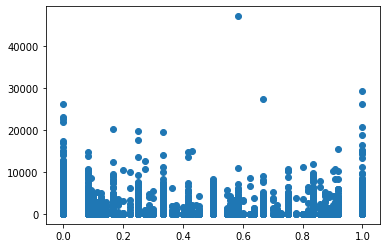

In [40]:
# Cluster Number 1
# This segment is characterised by customers who have high balances 
# and cash advances and one of the lowest purchase frequencies and percentages of full payments
'''
High
BALANCE
CASH_ADVANCE

Low
PURCHASES_FRECUENCY
PRC_FULL_PAYMENT
'''

plt.scatter(df['PURCHASES_FREQUENCY'],df['CASH_ADVANCE'])

In [41]:
#make a dataframe called xBal to hold the predictive features (exclude BALANCE)
xBal= df.drop(['BALANCE', 'PAYMENTS','PURCHASES','CREDIT_LIMIT','PRC_FULL_PAYMENT'], axis=1)
xBal.head()

,CASH_ADVANCE,PURCHASES_FREQUENCY
0,0.000000,0.166667
1,6442.945483,0.000000
2,0.000000,1.000000
3,205.788017,0.083333
4,0.000000,0.083333


In [42]:
#dataframe of one column
#holds target variable "category"
yBal= df['PRC_FULL_PAYMENT'].copy()
yBal.head(3)

0    0.000000
1    0.222222
2    0.000000
Name: PRC_FULL_PAYMENT, dtype: float64

In [44]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(xBal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
print(kmeans.cluster_centers_)

# for this particular example  the first number represent: CASH_ADVANCE (axis X) and 
#  PURCHASES_FREQUENCY second number (axis y)

[[3.56460467e+03 2.96863886e-01]
 [2.71920354e+02 5.29730238e-01]
 [1.11414058e+04 2.94873466e-01]]


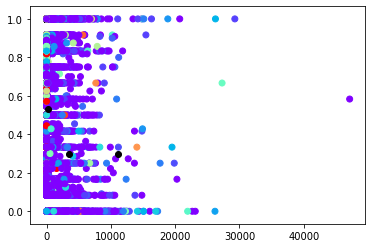

In [32]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df['CASH_ADVANCE'],df['PURCHASES_FREQUENCY'], c=df['PRC_FULL_PAYMENT'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [46]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df['cluster'] = kmeans.labels_

In [49]:
df.head(3)

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,95.40,0.000000,0.166667,1000.0,201.802084,0.000000,1
1,3202.467416,0.00,6442.945483,0.000000,7000.0,4103.032597,0.222222,0
2,2495.148862,773.17,0.000000,1.000000,7500.0,622.066742,0.000000,1


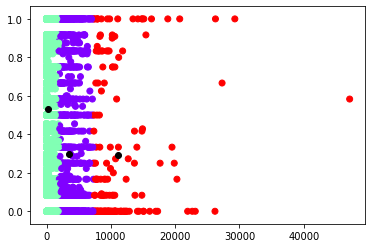

In [50]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(df['CASH_ADVANCE'],df['PURCHASES_FREQUENCY'], c=df['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

#### Conslusion: There is no relation between CASH_ADVANCE and PURCHASES_FREQUENCY